In [ ]:
import zipfile  # For faster extraction
dataset_path = "/content/drive/MyDrive/diploma/archive (2).zip"  # Replace with your dataset path
zfile = zipfile.ZipFile(dataset_path)
zfile.extractall()

In [ ]:
import os
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
MY_PATH='/content/BraTS2020_TrainingData'

TRAIN_DATASET_PATH =MY_PATH+ '/MICCAI_BraTS2020_TrainingData/'

In [ ]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_356/BraTS20_Training_356_flair.nii').get_fdata()
print(test_image_flair.max())
#Scalers are applied to 1D so let us reshape and then reshape back to original shape. 
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_356/BraTS20_Training_356_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_356/BraTS20_Training_356_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_356/BraTS20_Training_356_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_356/BraTS20_Training_356_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)


3247.0


In [ ]:
test_image_t1ce=nib.load(t1ce_list[1]).get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

NameError: ignored

In [ ]:
test_image_t1ce[25:205,40:220,70].shape

(180, 180)

In [ ]:
test_image_t1ce[25:205,40:220,2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
plt.imshow(np.linalg.inv(test_image_t1ce[25:205,40:220,2]))

LinAlgError: ignored

In [ ]:
test_image_t1.shape

(240, 240, 155)

In [ ]:

for i in range():
    plt.title(i)
    plt.imshow(test_image_t1ce[25:200,40:220,i], cmap='gray')
    plt.show()

SyntaxError: ignored

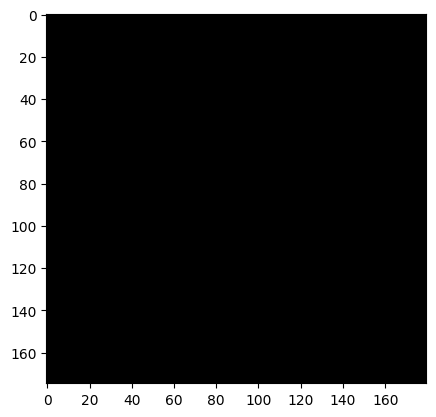

In [ ]:
plt.imshow(test_mask[25:200,40:220,36], cmap='gray')

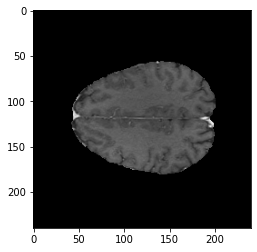

In [ ]:
plt.imshow(test_image_t1ce[:,:,100], cmap='gray')

[0 1 2 4]
[0 1 2 3]


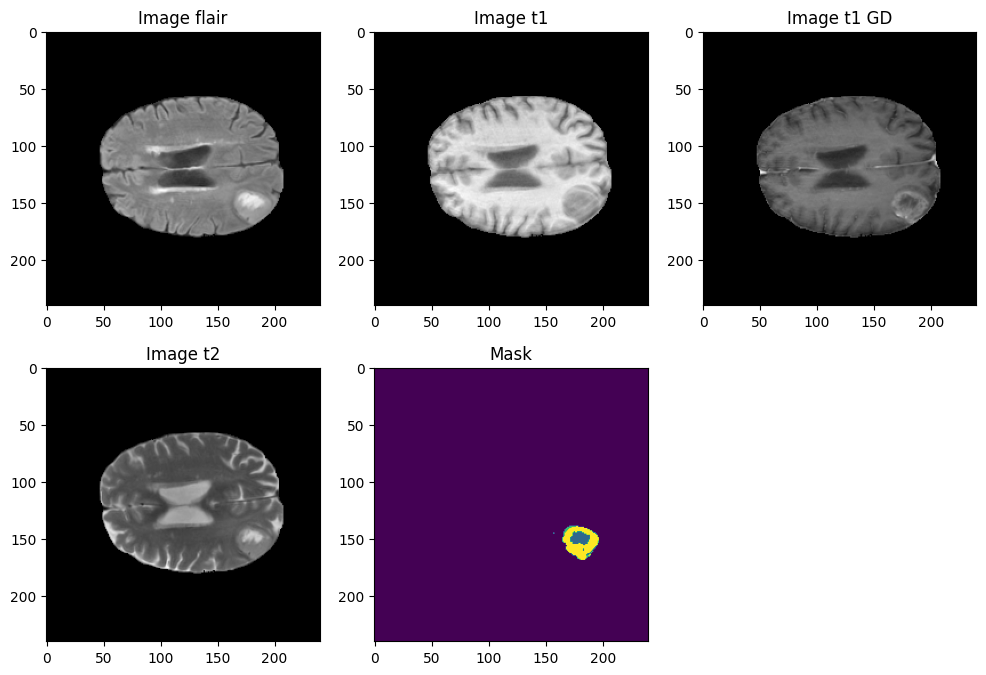

In [ ]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1 GD')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:

for i in range(154):
    plt.figure(figsize=(12, 8))
    plt.imshow(test_image_t1ce[:,:,i], cmap='gray')
    plt.title('Image t1ce' )

    plt.show

In [ ]:
test_mask[:,:,].shape

(240, 240, 155)

In [ ]:
# # # images lists harley
t1_list = sorted(glob.glob('BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/*/*t1.nii'))
t2_list = sorted(glob.glob(TRAIN_DATASET_PATH+'*/*t2.nii'))
t1ce_list = sorted(glob.glob(TRAIN_DATASET_PATH+'*/*t1ce.nii'))
flair_list = sorted(glob.glob(TRAIN_DATASET_PATH+'*/*flair.nii'))
mask_list = sorted(glob.glob(TRAIN_DATASET_PATH+'*/*seg.nii'))


In [ ]:
len(t1_list)

369

In [ ]:
mask_list.insert(354,'/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/W39_1998.09.19_Segm.nii')

In [ ]:
mask_list[354]

'/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/W39_1998.09.19_Segm.nii'

In [ ]:
len(t1_list)

369

In [ ]:
len(t1ce_list)

369

In [ ]:
# ## #Каждый том генерирует 18 вложенных объемов размером 64x64x4.
# #Всего 369 томов = 6642 подтома

In [ ]:
import os
import numpy as np


def load_img( img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
            
        temp_image_t1ce=nib.load(image_name).get_fdata()
        temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
        temp_combined_images = temp_image_t1ce[...,np.newaxis]
        temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
        images.append(temp_combined_images)
    images = np.array(images)
    
    return(images)

def load_mask( mask_list):
    masks=[]
    for i, image_name in enumerate(mask_list): 
        
        temp_mask=nib.load(image_name).get_fdata()
        temp_mask=temp_mask.astype(np.uint8)
        temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
        temp_mask = temp_mask[56:184, 56:184, 13:141]
        temp_mask= to_categorical(temp_mask, num_classes=4)
        
        masks.append(temp_mask)
    masks = np.array(masks)
    
    return(masks)



def imageLoader( img_list,  mask_list,batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_list[batch_start:limit])
#             X_new= X
            Y = load_mask( mask_list[batch_start:limit])


            yield (X,Y )#a tuple with two numpy arrays with batch_size samples    
#             yield (X_new,[ Y_new , X_new] )#a tuple with two numpy arrays with batch_size samples     


            batch_start += batch_size   
            batch_end += batch_size

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(t1ce_list, mask_list, test_size=0.1, shuffle=True, random_state=42)

batch_size=1
train_img_datagen = imageLoader(X_train, y_train, batch_size)
val_img_datagen = imageLoader(X_test, y_test, batch_size)

In [ ]:
len(t1ce_list)

369

In [ ]:
image_array = load_img(t1_list[0:40])

KeyboardInterrupt: ignored

In [ ]:
image_array[0].shape

(128, 128, 128, 1)

Text(0.5, 1.0, 'Image t1ce')

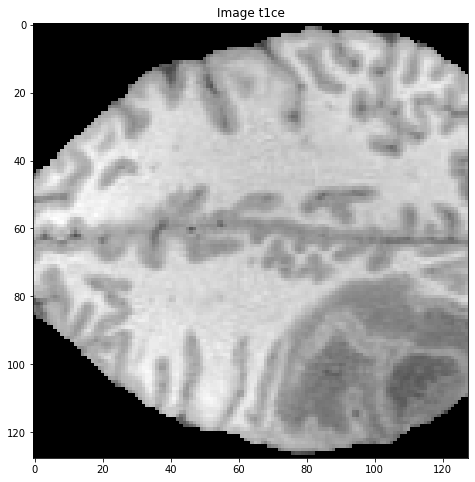

In [ ]:
plt.figure(figsize=(12, 8))
plt.imshow(image_array[3][:,:,85,0], cmap='gray')
plt.title('Image t1ce' )

In [ ]:
len(image_array)

In [ ]:
image_array[0][:,:,:,:].shape

(128, 128, 128, 1)

In [ ]:
np.savez('/content/drive/MyDrive/'+, image_array[0][:,:,90,:])

In [ ]:
x = np.load('/content/drive/MyDrive/0.npz')

In [ ]:
np.reshape(x['arr_0'], (1,128,128)).shape

(1, 128, 128)

In [ ]:
arr = range(80,100)

In [ ]:
x['arr_0'].shape

(128, 128, 1)

In [ ]:
mask_list[0]

'/content/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii'

In [ ]:
len(mask_list)

369

In [ ]:
img = range(100,300,2)
len(img)

100

In [ ]:
idx = range(50,120)

In [ ]:
len(idx)

70

In [ ]:
len(mask_list)

369

In [ ]:
count = 0
for img in range(100,300,2):
    for idx in range(50,120):
        test_mask=nib.load(mask_list[img]).get_fdata()
        test_mask=test_mask.astype(np.uint8)
        x = np.reshape(test_mask[25:205,40:220,idx], ((1,180,180)))
        np.savez('/content/drive/MyDrive/BratS_target_test/'+str(count), x)
        test_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
        test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
        x = np.reshape(test_image_t1ce[25:205,40:220,idx], ((1,180,180)))
        np.savez('/content/drive/MyDrive/BratS_test/'+str(count), x)
        count+=1

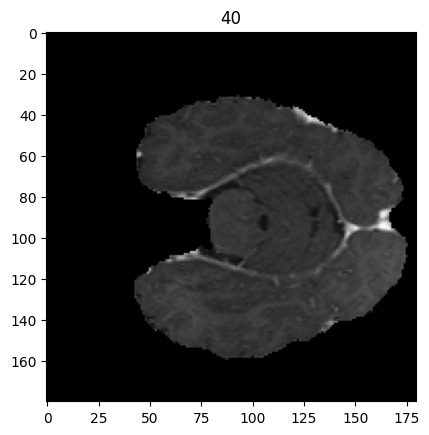

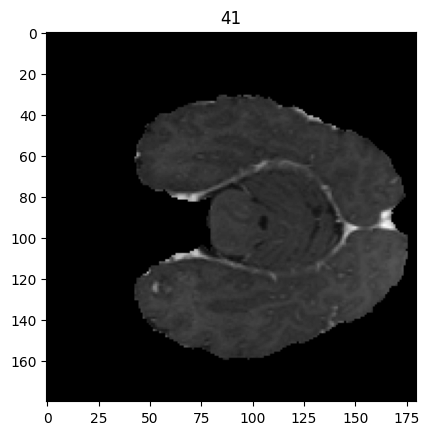

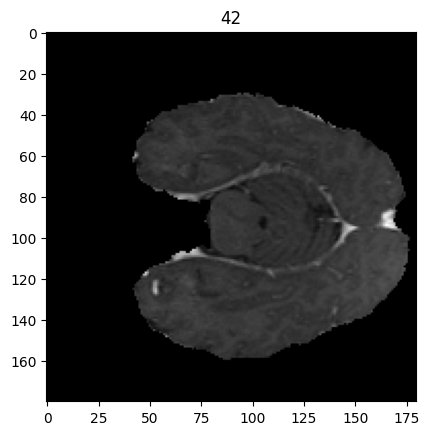

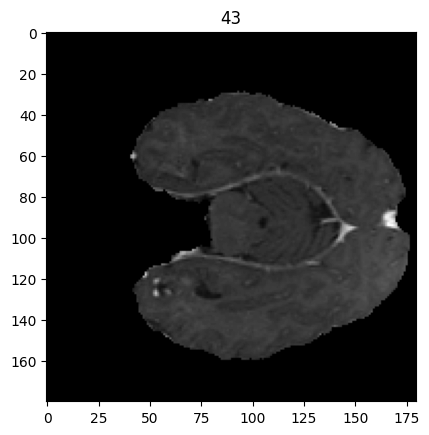

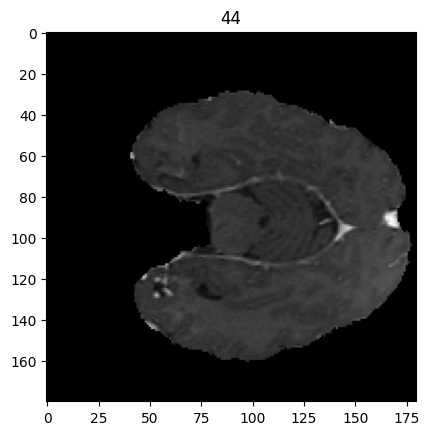

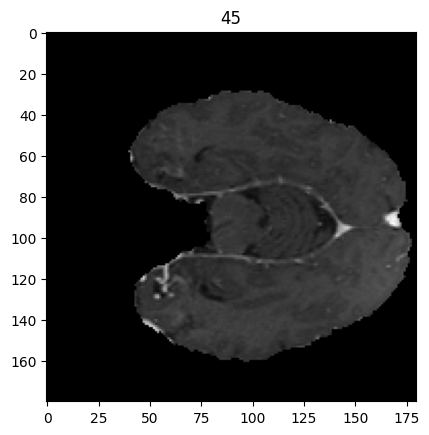

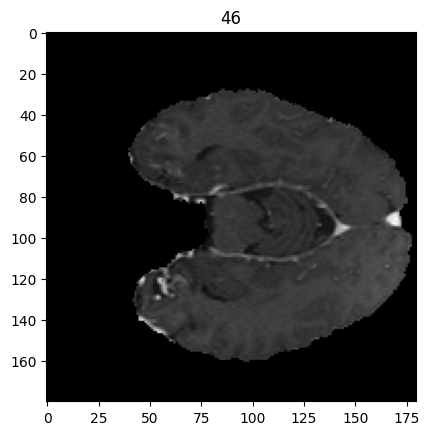

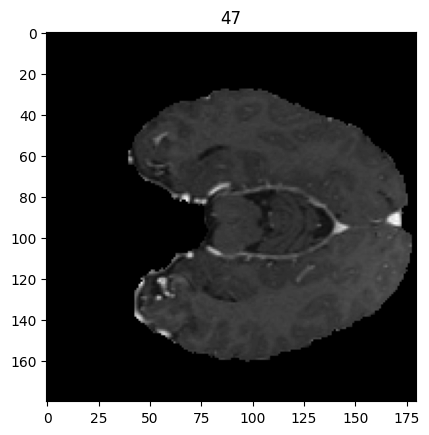

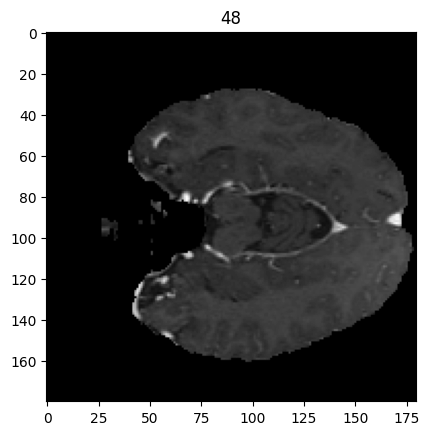

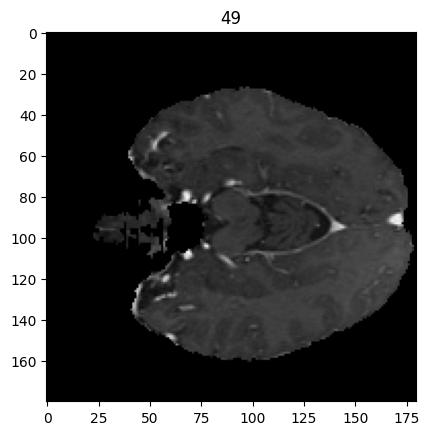

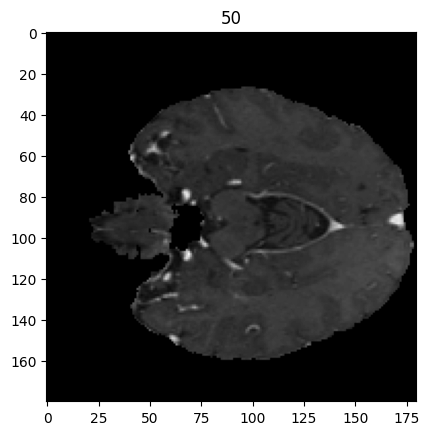

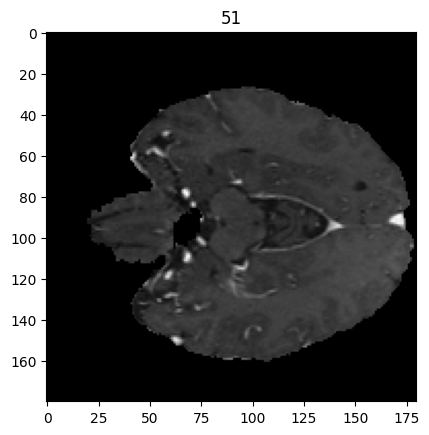

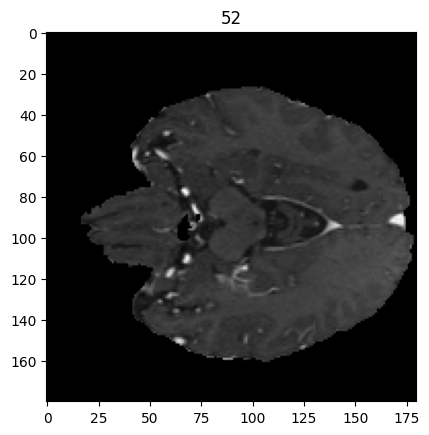

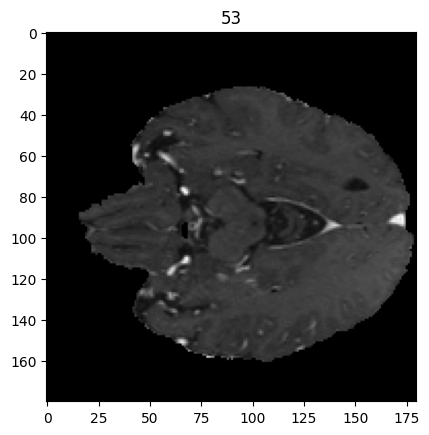

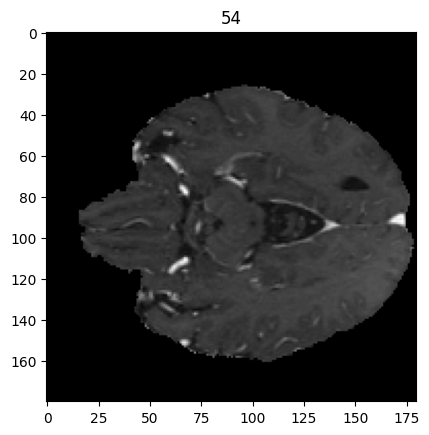

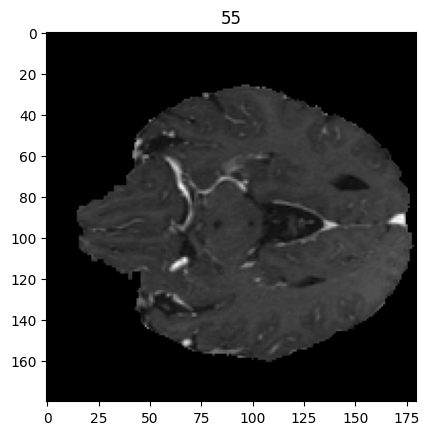

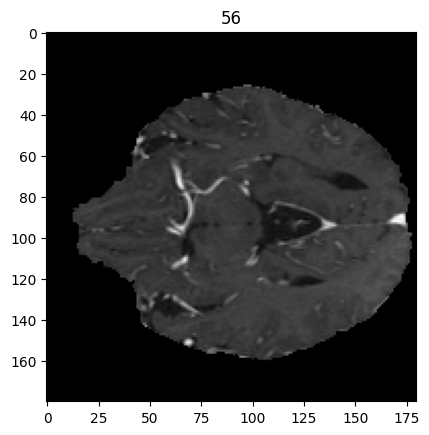

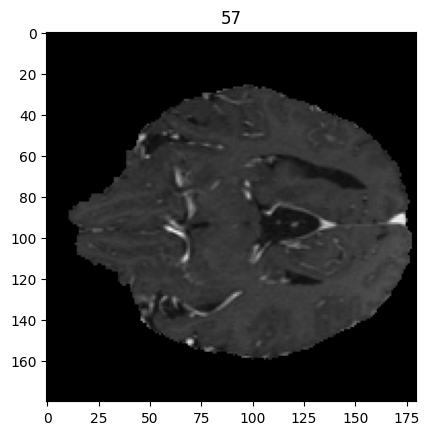

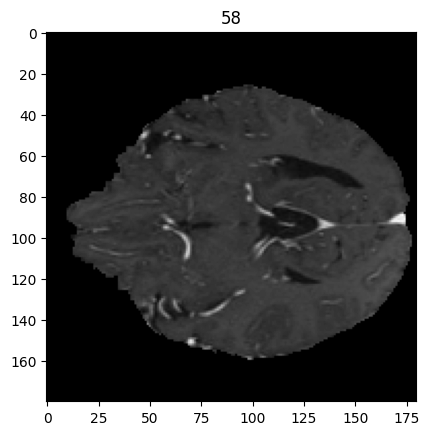

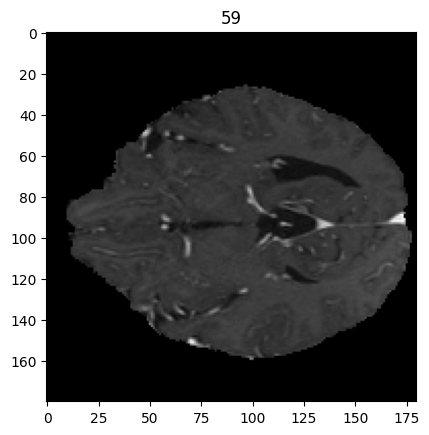

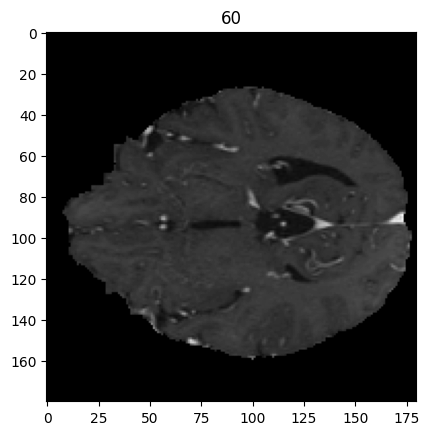

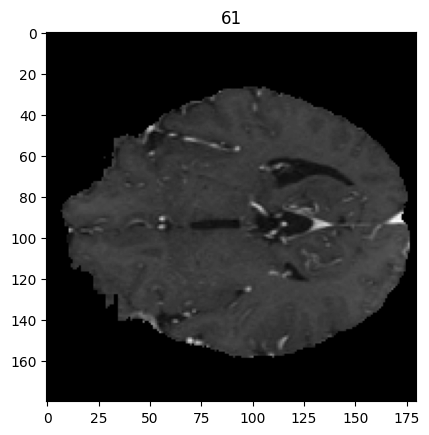

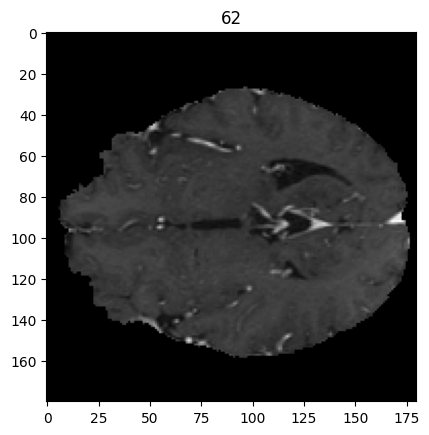

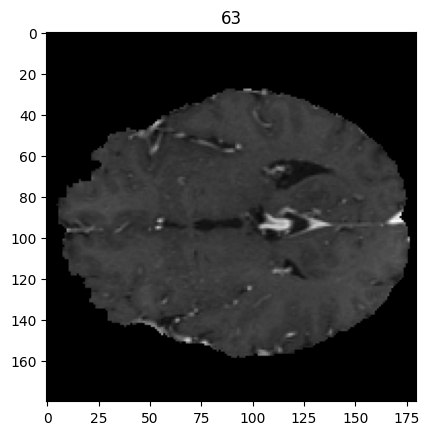

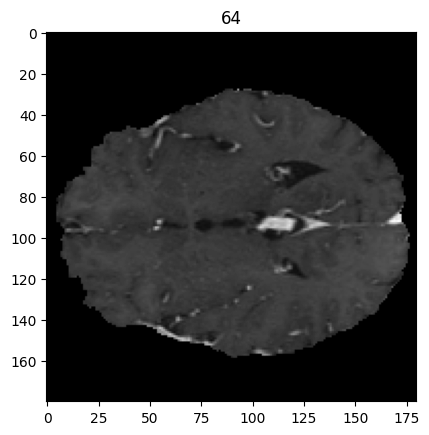

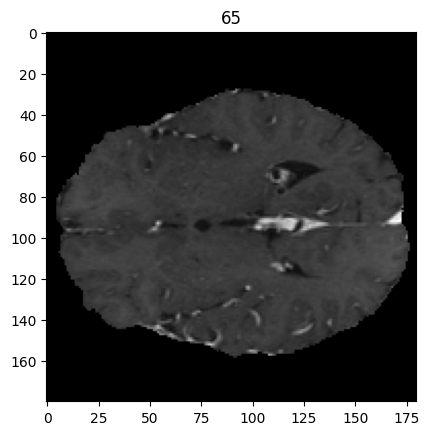

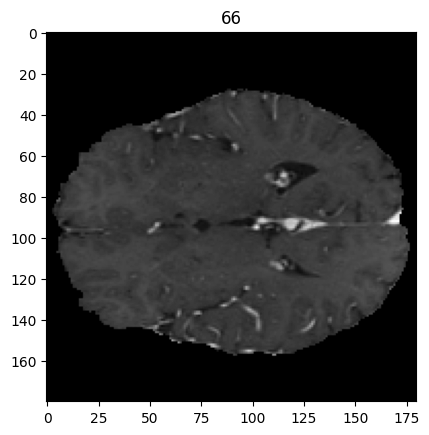

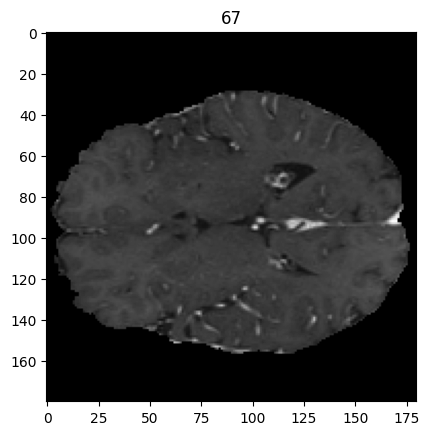

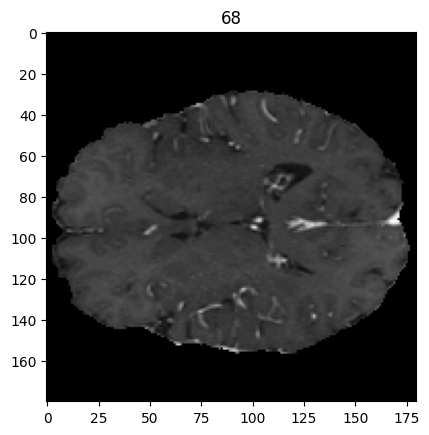

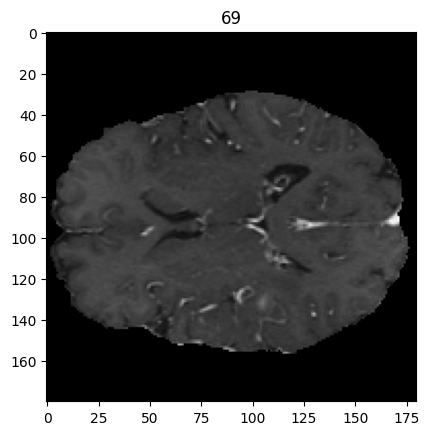

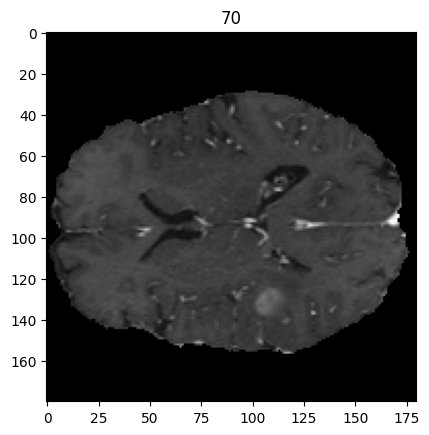

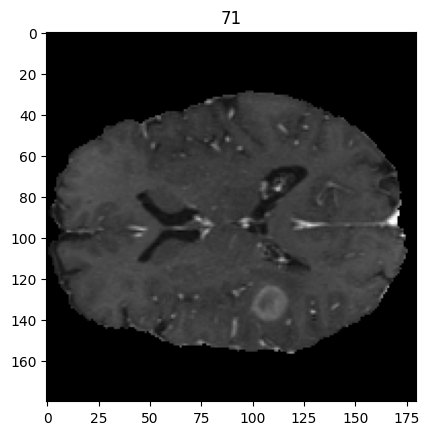

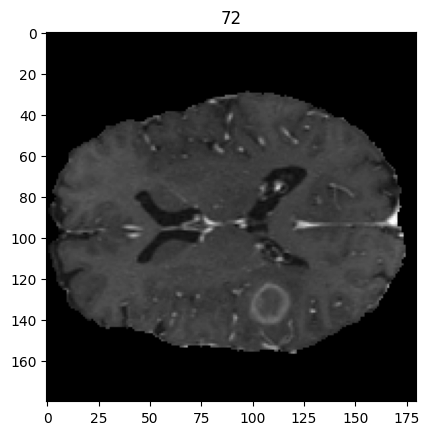

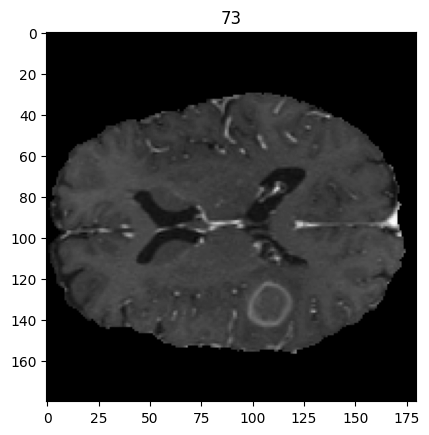

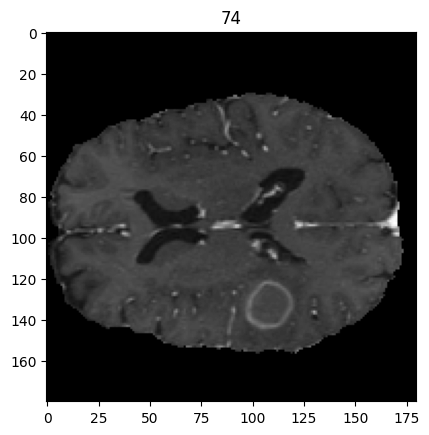

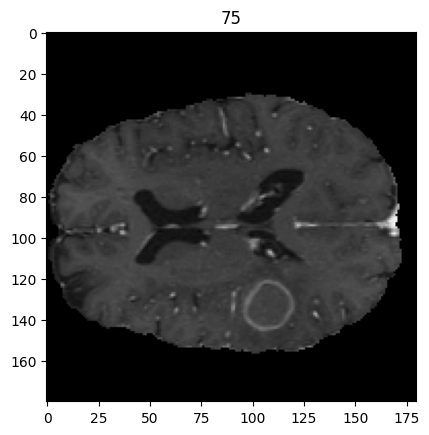

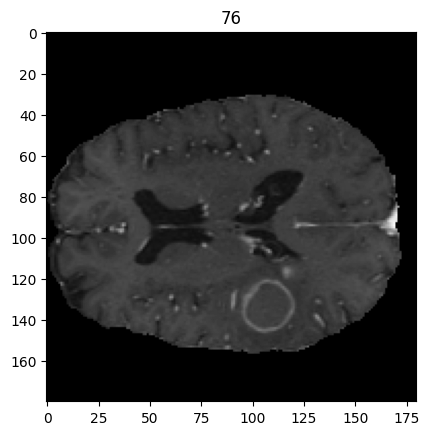

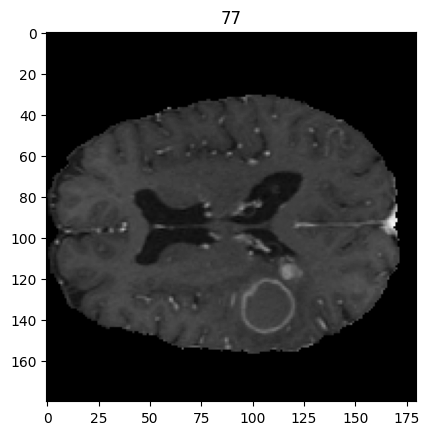

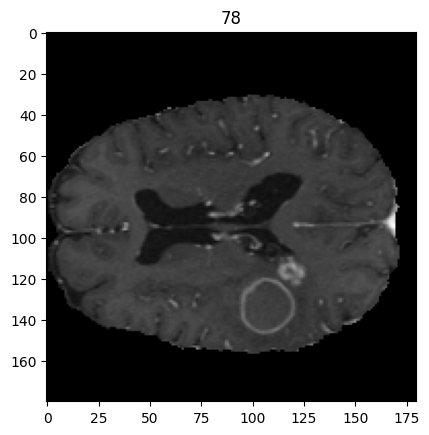

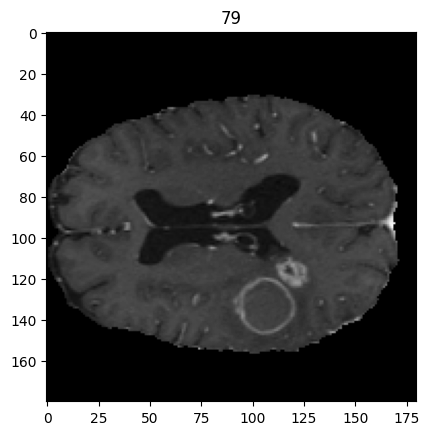

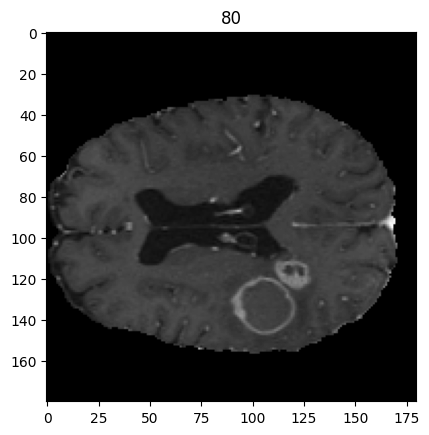

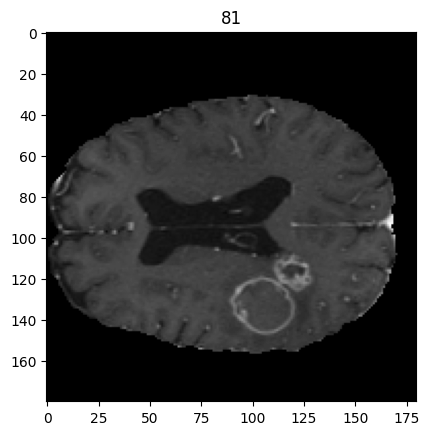

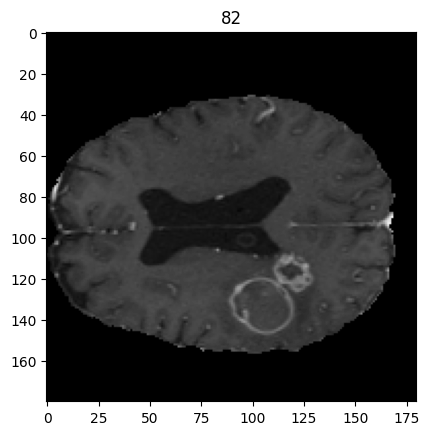

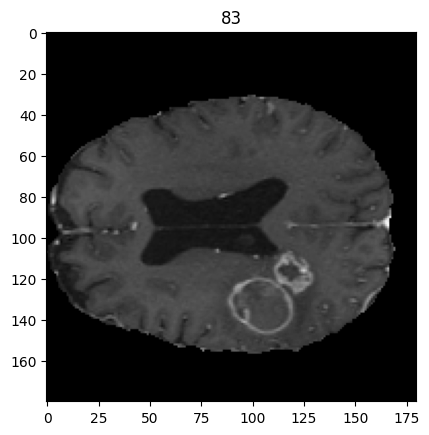

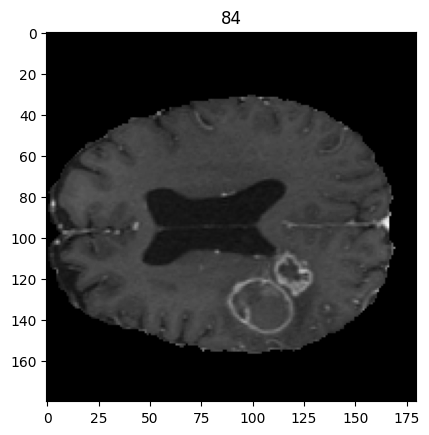

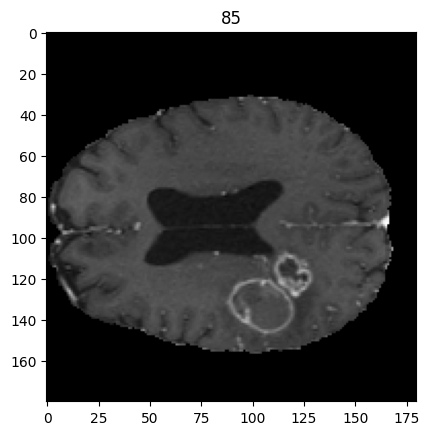

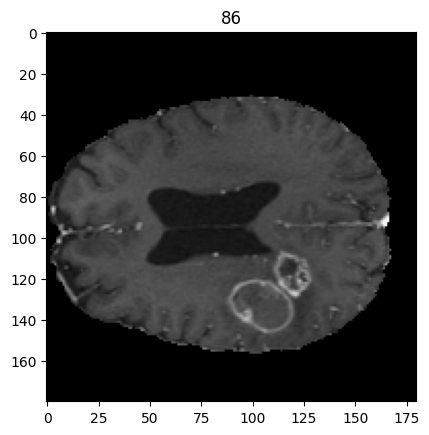

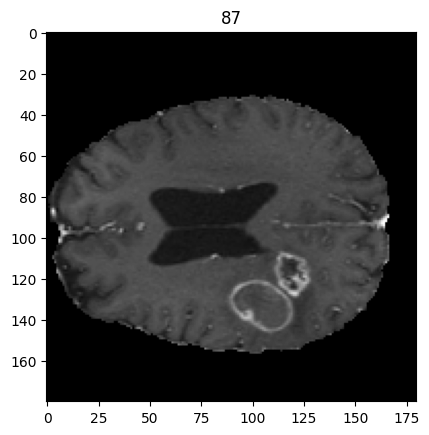

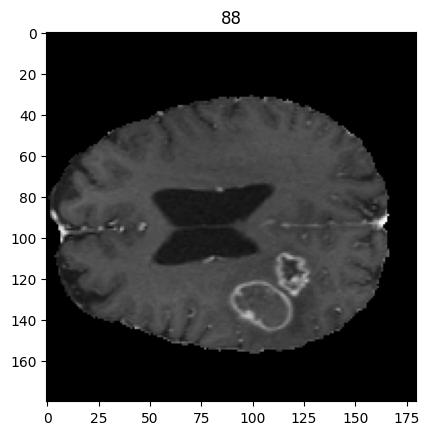

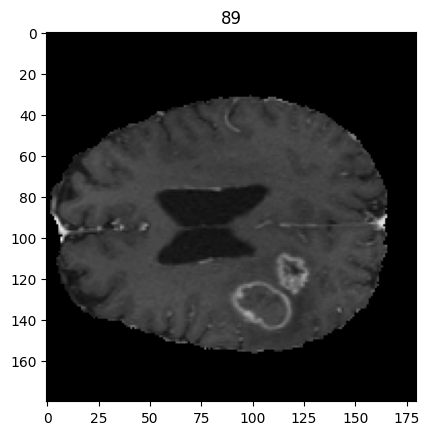

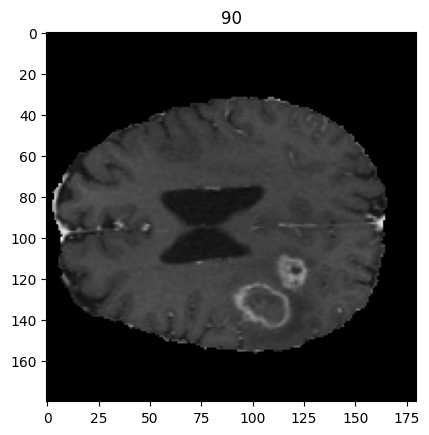

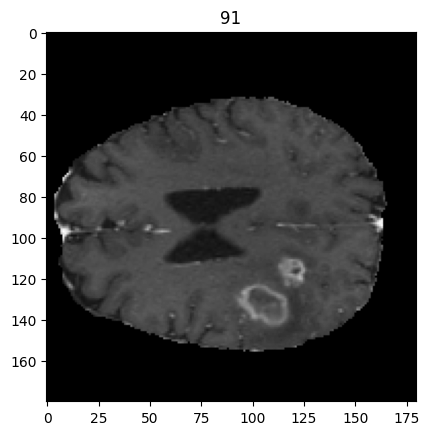

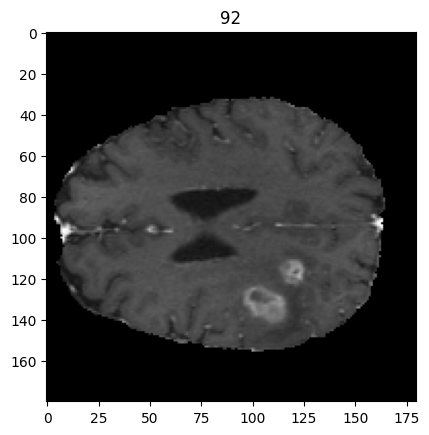

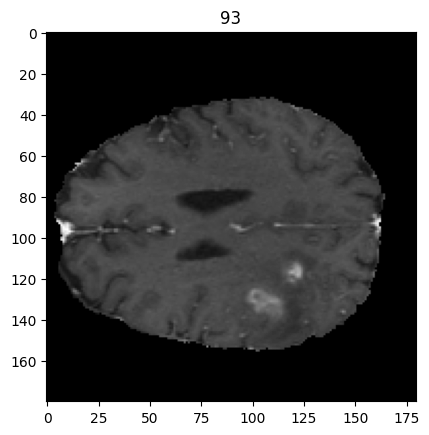

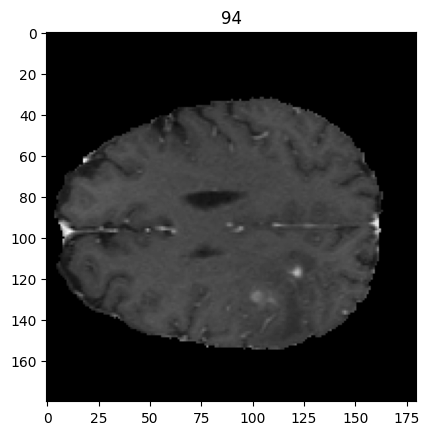

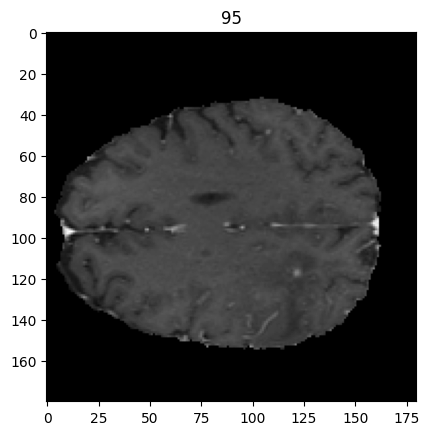

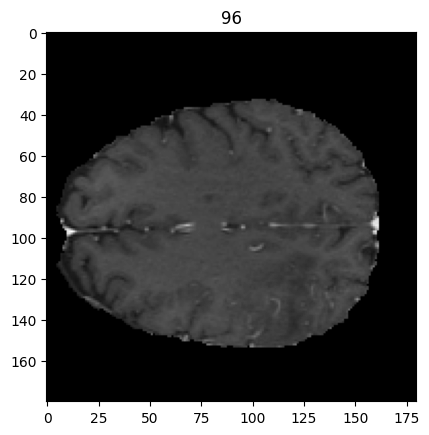

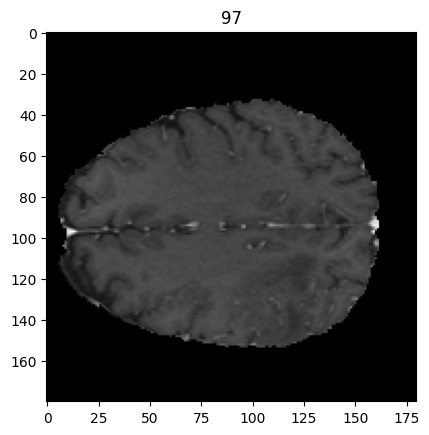

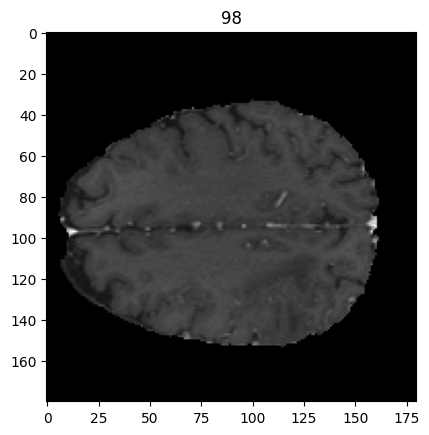

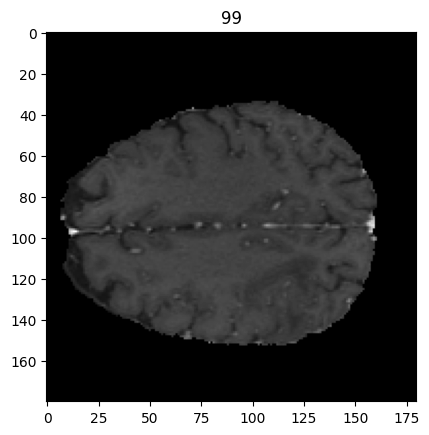

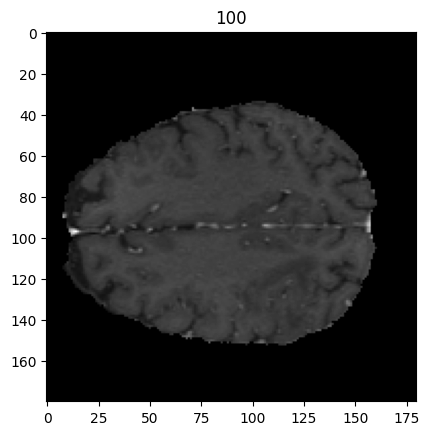

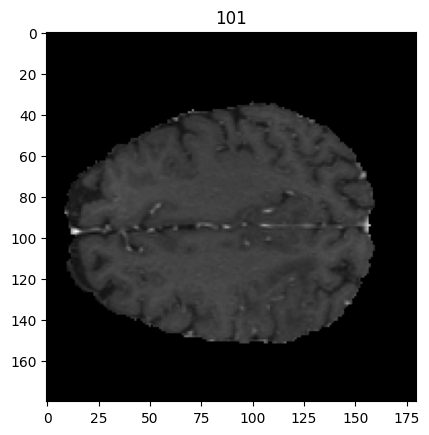

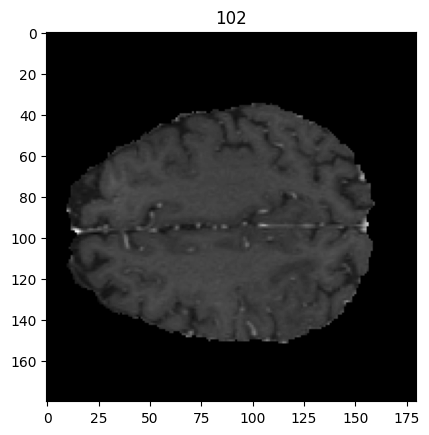

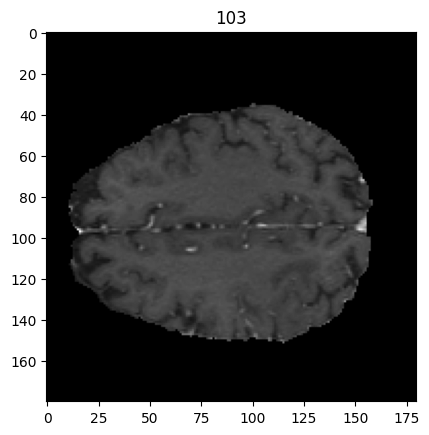

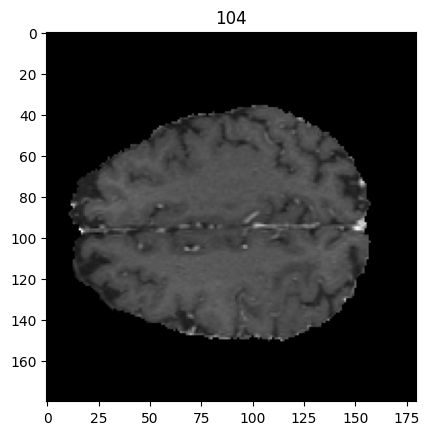

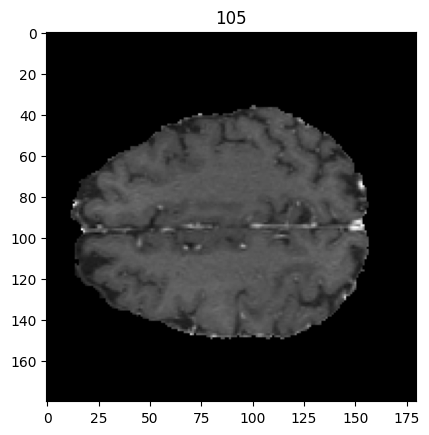

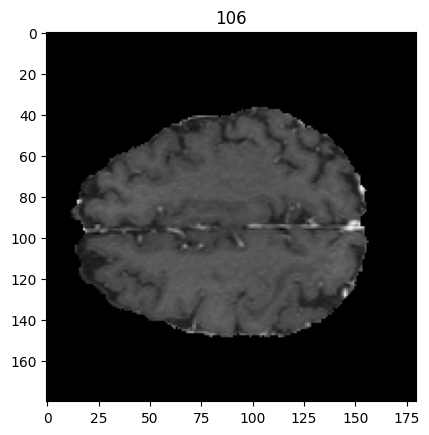

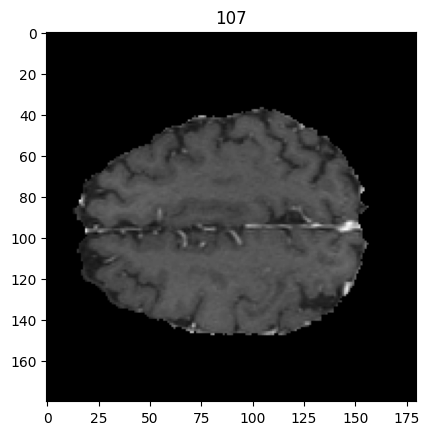

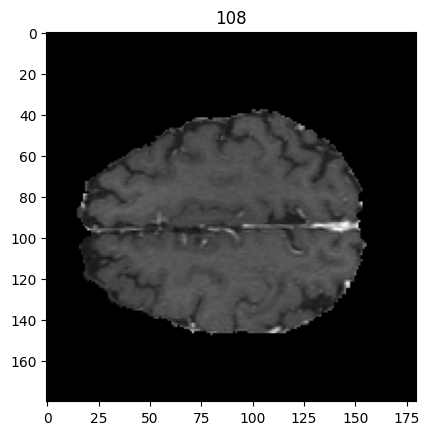

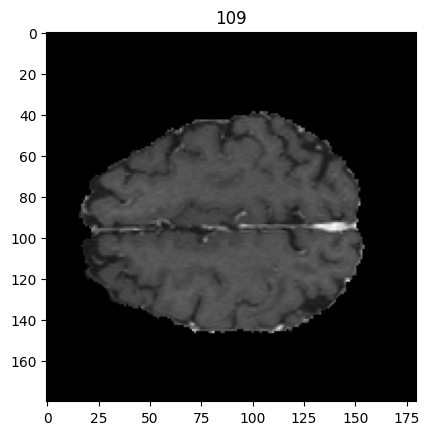

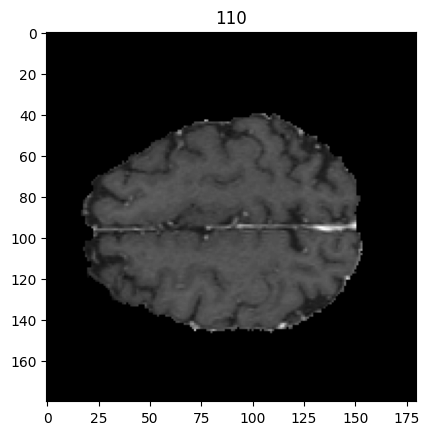

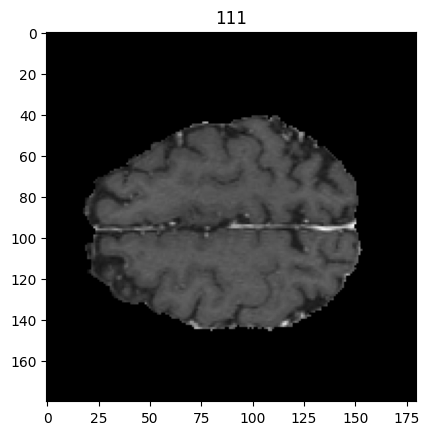

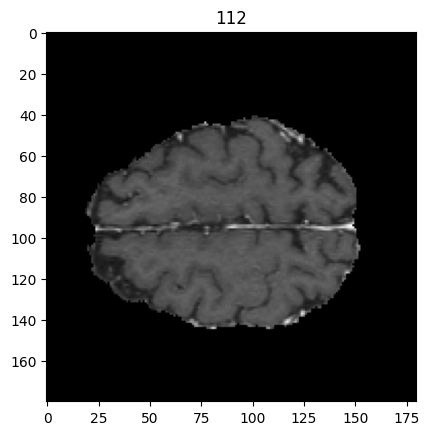

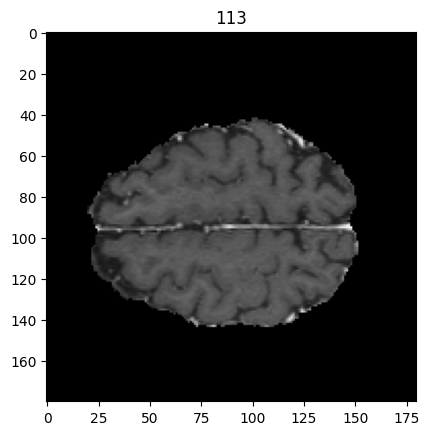

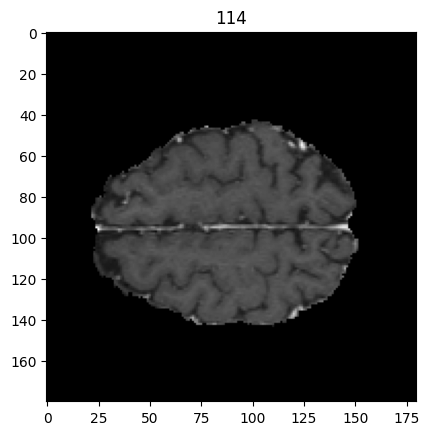

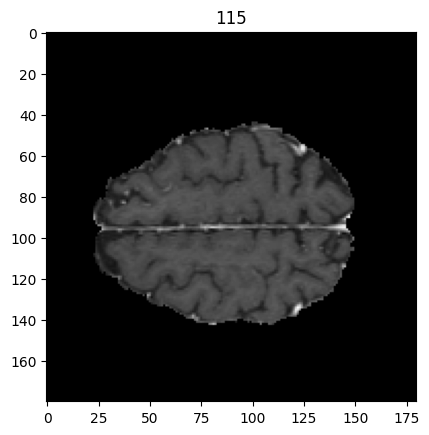

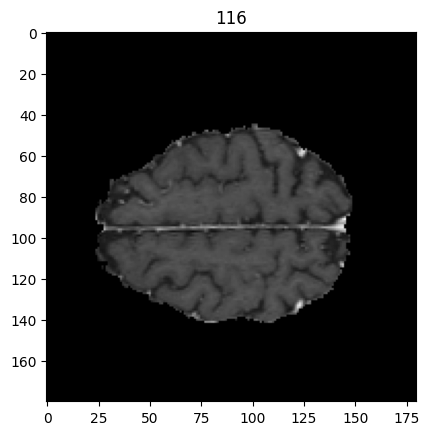

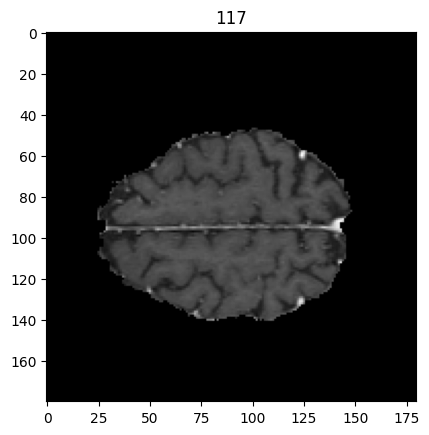

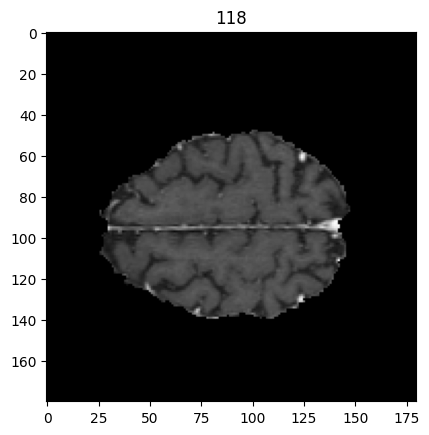

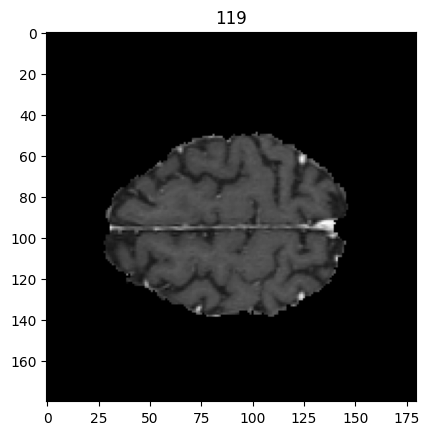

In [ ]:
count = 0 #-->2000
count_image_array = 1
arr = range(40,120)

for j in arr:
    test_image_t1ce=nib.load(t1ce_list[72]).get_fdata()
    test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
    x = np.reshape(test_image_t1ce[25:205,40:220,j], ((1,180,180)))
    plt.title(j)
    plt.imshow(x[0,:,:], cmap = "gray")
    plt.show()


In [ ]:
#картинки размером (1,180,180)
count = 0 #-->2000
count_image_array = 40
arr = range(50,100)
for i in range(count_image_array):
    for j in arr:
        test_image_t1ce=nib.load(t1ce_list[i]).get_fdata()
        test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)
        x = np.reshape(test_image_t1ce[25:205,40:220,j], ((1,180,180)))
        np.savez('/content/drive/MyDrive/BratS_numpy_dataset_3_180*180/'+str(count), x)
        count+=1
        print(count)

In [ ]:
#таргетные картинки размером (1,180,180)
count = 0 #-->2000
count_image_array = 40
arr = range(50,100)
for i in range(count_image_array):
    for j in arr:
        test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_356/BraTS20_Training_356_seg.nii').get_fdata()
        test_mask=test_mask.astype(np.uint8)
        x = np.reshape(test_mask[25:205,40:220,j], ((1,180,180)))
        np.savez('/content/drive/MyDrive/BratS_numpy_dataset_target_3_180*180/'+str(count), x)
        count+=1
        print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
count = 0 #-->800
count_image_array = len(image_array)
arr = range(80,100)
for i in range(count_image_array):
    for j in arr:
        x = np.reshape(image_array[i][:,:,j,0], ((1,128,128)))
        np.savez('/content/drive/MyDrive/BratS_numpy_dataset_2/'+str(count), x)
        count+=1
        print(count)

In [ ]:
for i in arr:
    plt.figure(figsize=(12, 8))
    plt.imshow(image_array[4][:,:,i,0], cmap='gray')
    plt.title('Image t1ce' )

In [ ]:
min(len(X_train),1)

1

In [ ]:
train_img_datagen.__next__()

In [ ]:
x,y = train_img_datagen.__next__()

In [ ]:
x.

(1, 128, 128, 128, 1)

In [ ]:
x = x[:,:,:,90,:]

In [ ]:
x.shape

(1, 128, 128, 1)

In [ ]:
y = np.reshape(x, (1,1,128,128))

In [ ]:
y = np.reshape(y, (1,128,128,1,1))

In [ ]:
y.shape

(1, 128, 128, 1, 1)

In [ ]:
x.shape

(1, 128, 128, 1)

In [ ]:
Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(x)

AttributeError: ignored

In [ ]:
arr = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(x)

In [ ]:
m(arr)

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want


################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs
    #Block A
    #c1 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', )(s)
    #c1 = Dropout(0.1)(c1)
    #c1 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    #p1 = nn.BatchNorm3d(128)(c1)

    #Block C
    #P = 1024
    #c2 = nn.Conv1d(kernel_size = (1), in_channels=1, out_channels = P)

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    c_atten_6=attention_block(u6,c4,128,bn=True)
    u6 = concatenate([u6, c_atten_6])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    c_atten_7=attention_block(u7,c3,64,bn=True)
    u7 = concatenate([u7, c_atten_7])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    c_atten_8=attention_block(u8,c2,32,bn=True)
    u8 = concatenate([u8, c_atten_8])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    c_atten_9=attention_block(u9,c1,16,bn=True)
    u9 = concatenate([u9, c_atten_9])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c1)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

In [ ]:
from torch import nn

In [ ]:
ReLU = tf.keras.layers.ReLU()
FLATTEN = tf.keras.layers.Flatten()

class USS_NET(nn.Module):
    def __init__(self, num_of_classes, P):
        super(USS_NET, self).__init__()
        self.A = Block_A()
        self.B = Block_B()
        self.C = Block_C(P=P)
        self.GC = Block_global_C(P)
        self.out = OUT(num_of_classes, P)
    def forward(self, x):
        x = self.A(x)
        y = self.C(x)
        z = self.B(x)
        z = self.GC(z)
        result_global=self.out(z)
        return y, result_global

class OUT(nn.Module):
    def __init__(self, num_of_classes, P):
        super(OUT, self).__init__()
        self.out = nn.ModuleList([Block_D(P) for _ in range(num_of_classes)])
    def forward(self, x):
        result=[]
        for i in range(len(self.out)):
            result.append(self.out[i](x))
        return result

class Block_global_C(nn.Module):
    def __init__(self, P):
        super(Block_global_C, self).__init__()
        self.fc2 = Conv3D(P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.fc1 = Conv3D(P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.BatchNorm = BatchNormalization()
        self.fc3 = Conv3D(P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.fc4 = Conv3D(P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
    
    def forward(self,x):
        y = self.fc2(x)
        x = self.fc1(x)
        x = self.BatchNorm(x)
        x = ReLU(x)
        x = self.fc3(x)
        x = self.fc4(x+y)
        return x


class Block_D(nn.Module):
    def __init__(self, P):
        super(Block_D, self).__init__()
        self.fc1 = tf.keras.layers.Dense(1)
        self.BatchNorm = BatchNormalization()
    
    def forward(self,x):
        x = self.fc1(x)
        x = self.BatchNorm(x)
        x = ReLU(x)
        return x


class Block_B(nn.Module):#непонятно что с flatten и linear
    def __init__(self):
        super(Block_B, self).__init__()
        self.fc1 = Conv3D(256, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.BatchNorm_1 = BatchNormalization()
        #self.flatten_1 = tf.keras.layers.Flatten()
        self.fc2 = tf.keras.layers.Dense(1024)
        self.BatchNorm_2 = BatchNormalization()
        #self.flatten_2 = tf.keras.layers.Flatten()
        self.fc3 = tf.keras.layers.Dense(64)

    def forward(self, x):
        x = self.fc1(x)
        x = self.BatchNorm_1(x)
        x = ReLU(x)
        #x = self.flatten_1(x)
        x = self.fc2(x)
        x = self.BatchNorm_2(x)
        x = ReLU(x)
        x = self.fc3(x)
        #x = tf.expand_dims(x, axis = 1)
        return x

#Linear = tf.keras.layers.Dense(1024)######
class Block_C(nn.Module):
    def __init__(self, P):
        super(Block_C, self).__init__()
        self.fc1 = Conv3D(filters = P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.fc1_alt = Conv3D(filters = P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.BatchNorm = BatchNormalization()
        self.fc3 = Conv3D(filters = P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)
        self.fc4 = Conv3D(filters = P, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same',)

    def forward(self, x):
        y = self.fc1_alt(x)
        x = self.fc1(x)
        x = self.BatchNorm(x)
        x = ReLU(x)
        x = self.fc3(x)
        x = self.fc4(x+y)
        return x


class Block_A(nn.Module):
    def __init__(self):
        super(Block_A, self).__init__()
        self.fc1 = Conv3D(filters = 64, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', )
        self.fc2 = Conv3D(filters = 128, kernel_size = (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same', )
        self.fc3 = BatchNormalization()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = ReLU(self.fc3(x))
        return x





In [ ]:
def show_me_fetures(result):
    if result.dim()==4:
        for b in range(result.size()[0]):
            for f in range(result.size()[1]):
                plt.imshow(result[b,f,:,:].cpu().detach().numpy())
                plt.show()
    if result.dim()==3:
        for f in range(result.size()[0]):
            plt.imshow(result[f,:,:].cpu().detach().numpy())
            plt.show()
            
def show_me_mask(result):
    if result.dim()==4:
        for b in range(result.size()[0]):
            plt.imshow(torch.argmax(result[b,:,:,:], dim=0).cpu().detach().numpy())
            plt.show()
    if result.dim()==3:
        plt.imshow(torch.argmax(result, dim=0).cpu().detach().numpy())
        plt.show()

In [ ]:
model = USS_NET(num_of_classes = 4, P = 128)

In [ ]:
Local_Features_L, global_Features = model(x)

In [ ]:
import torch

In [ ]:
len(global_Features)

4

In [ ]:
type(x)

numpy.ndarray

In [ ]:
r = global_Features[0][:,:,0]
class_segmentation = tf.einsum('nchw, nc->nhw', Local_Features_L, r)

InvalidArgumentError: ignored

In [ ]:
def calculate_LS(batch_size, image):
    image = image
    Local_Features_L, global_Features = net(image)
    logit = torch.zeros(batch_size, len(global_Features), Local_Features_L.size()[2],Local_Features_L.size()[3])
    logit = logit

    for i in range(len(global_Features)):
        r = global_Features[i][:,:,0]
        class_segmentation = torch.einsum('nchw, nc->nhw', Local_Features_L, r)
        logit[:,i,:,:]+= class_segmentation

    end_segmentation = F.softmax(logit, dim = 1)
    Feature_Assignment_S = torch.zeros(Local_Features_L.size())
    Feature_Assignment_S = Feature_Assignment_S

    for classes in range(len(global_Features)):
        Feature_Assignment_S+=torch.einsum('xyz,ij -> xjyz', end_segmentation[:, classes, :, :], global_Features[classes][:,:,0])
    return Local_Features_L, Feature_Assignment_S, end_segmentation

In [ ]:
y.shape

TensorShape([4, 128, 128, 1, 128])

In [ ]:
result_global[0].shape

TensorShape([4, 128, 128, 1, 1])

In [ ]:
model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=1, 
                          num_classes=4)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 128, 1  0         
                             )]                                  
                                                                 
 conv3d_11 (Conv3D)          (None, 128, 128, 128, 16  448       
                             )                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 128, 16  0         
                             )                                   
                                                                 
 conv3d_12 (Conv3D)          (None, 128, 128, 128, 16  6928      
                             )                                   
                                                                 
 conv3d_41 (Conv3D)          (None, 128, 128, 128, 4)  68    

In [ ]:
model(x).shape

TensorShape([4, 128, 128, 128, 4])

In [ ]:
!pip install segmentation-models-3D

In [ ]:
import segmentation_models_3D as sm
from tensorflow import keras
import tensorflow as tf
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)
model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
batch_size=1
steps_per_epoch = len(t1ce_list)//batch_size

In [ ]:
os.mkdir('checkpoint/')

In [ ]:
checkpoint_filepath = '/kaggle/working/checkpoint/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='iou_score',
    verbose=1,
    )

In [ ]:
history=model.fit(train_img_datagen,
                  validation_data=val_img_datagen,
          steps_per_epoch=331,
        validation_steps=36,

          epochs=50,
          verbose=1,
          callbacks=[model_checkpoint_callback]
          )

Epoch 1/50


In [ ]:
model.save_weights('seg_atten_weights.h5')